In [34]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, f1_score


### Libraries for visualization

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from matplotlib import pyplot

In [2]:
column_names = ['buying','maint','doors','persons','lug_boot','safety','rating']
df = pd.read_csv('car.data', names=column_names)
df

,buying,maint,doors,persons,lug_boot,safety,rating
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
df.shape

(1728, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   rating    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,rating
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,5more,more,big,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder_X = LabelEncoder()
# df['buying'] = labelencoder_X.fit_transform(df['buying'])
# df['maint'] = labelencoder_X.fit_transform(df['maint'])
# df['lug_boot'] = labelencoder_X.fit_transform(df['lug_boot'])
# df['safety'] = labelencoder_X.fit_transform(df['safety'])
# df['rating'] = labelencoder_X.fit_transform(df['rating'])

In [7]:
# df

In [8]:
level4_mapper = {"low":1, "med":2, "high":3, "vhigh":4}
lugboot_mapper = {"small":1, "med":2, "big":3}
safety_mapper = {"low":1, "med":2, "high":3}
df["buying_mapped"] = df["buying"].replace(level4_mapper)
df["maint_mapped"] = df["maint"].replace(level4_mapper)
df["lugboot_mapped"] = df["lug_boot"].replace(lugboot_mapper)
df["safety_mapped"] = df["safety"].replace(safety_mapper)

rating_mapper= {"unacc":1, "acc":2, "good":3, "vgood":4}
df["rating_mapped"] = df["rating"].replace(rating_mapper)

df.loc[df['doors'] == '5more', 'doors'] = 5
df.loc[df['persons'] == 'more', 'persons'] = 5

df.head()

,buying,maint,doors,persons,lug_boot,safety,rating,buying_mapped,maint_mapped,lugboot_mapped,safety_mapped,rating_mapped
0,vhigh,vhigh,2,2,small,low,unacc,4,4,1,1,1
1,vhigh,vhigh,2,2,small,med,unacc,4,4,1,2,1
2,vhigh,vhigh,2,2,small,high,unacc,4,4,1,3,1
3,vhigh,vhigh,2,2,med,low,unacc,4,4,2,1,1
4,vhigh,vhigh,2,2,med,med,unacc,4,4,2,2,1


In [9]:
df_m = df[['buying_mapped','maint_mapped','doors','persons','lugboot_mapped','safety_mapped','rating_mapped']]
df_m.head()

,buying_mapped,maint_mapped,doors,persons,lugboot_mapped,safety_mapped,rating_mapped
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


In [10]:
X = df_m.drop(columns=['rating_mapped'])
X

,buying_mapped,maint_mapped,doors,persons,lugboot_mapped,safety_mapped
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2
...,...,...,...,...,...,...
1723,1,1,5,5,2,2
1724,1,1,5,5,2,3
1725,1,1,5,5,3,1
1726,1,1,5,5,3,2


In [11]:
y = df_m['rating_mapped']
y

0       1
1       1
2       1
3       1
4       1
       ..
1723    3
1724    4
1725    1
1726    3
1727    4
Name: rating_mapped, Length: 1728, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
results=[]
results_mis=[]
names =[]

## kNN

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [42]:
print(classification_report(y_test, knn_pred))
print(accuracy_score(y_test, knn_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       235
           2       0.95      0.87      0.91        83
           3       0.77      0.91      0.83        11
           4       1.00      0.71      0.83        17

    accuracy                           0.95       346
   macro avg       0.92      0.87      0.89       346
weighted avg       0.95      0.95      0.95       346

0.9508670520231214


In [16]:
test_accuracy=accuracy_score(y_test, knn_pred)*100
print("Accuracy for the testing dataset with tuning is : {:.2f}%".
      format(test_accuracy))
# test_fscore = f1_score(y_test, knn_pred, average='weighted')
# print('F-Measure: %.3f' % test_fscore)



Accuracy for the testing dataset with tuning is : 95.09%


Text(33.0, 0.5, 'Actual')

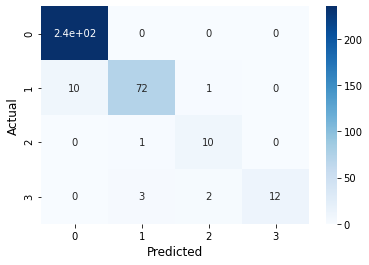

In [17]:
cf_matrix = confusion_matrix(y_test, knn_pred)
sns.heatmap(cf_matrix, cmap='Blues', annot= True)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

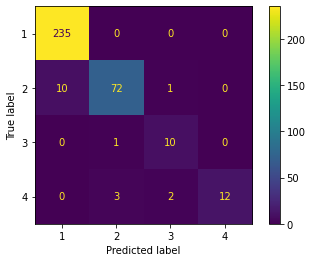

In [18]:
plot_confusion_matrix(knn, X_test, y_test)

In [36]:
accuracy_score(y_test, knn_pred)

0.9508670520231214

In [19]:
accuracies_knn = cross_val_score(estimator=knn, cv=10, X=X_train, y=y_train)
print("Accuracy: {:.2f} %".format(accuracies_knn.mean()*100))
print("Standard deviation: {:.2f} %".format(accuracies_knn.std()*100))

Accuracy: 95.37 %
Standard deviation: 1.45 %


In [20]:
misclassification_knn = 1-accuracies_knn
print("Misclassification: {:.2f} %".format(misclassification_knn.mean()*100))
# print("Standard deviation: {:.2f} %".format(misclassification_rf.std()*100))
results_mis.append(misclassification_knn)

Misclassification: 4.63 %


## Decision tree

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(classification_report(y_test, dt_pred))
print(accuracy_score(y_test, dt_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       235
           2       0.97      0.90      0.94        83
           3       0.56      0.91      0.69        11
           4       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.97      0.97      0.97       346

0.9653179190751445


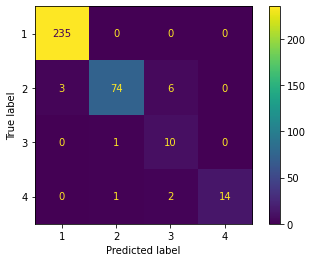

In [22]:
plot_confusion_matrix(dt, X_test, y_test)

In [23]:
accuracies_dt = cross_val_score(estimator=dt, cv=10, X=X_train, y=y_train)
print("Accuracy: {:.2f} %".format(accuracies_dt.mean()*100))
print("Standard deviation: {:.2f} %".format(accuracies_dt.std()*100))

Accuracy: 98.05 %
Standard deviation: 1.12 %


In [24]:
misclassification_dt = 1-accuracies_dt
print("Misclassification: {:.2f} %".format(misclassification_dt.mean()*100))

Misclassification: 1.95 %


## Random forest

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))
print(accuracy_score(y_test, rf_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       235
           2       0.99      0.90      0.94        83
           3       0.56      0.91      0.69        11
           4       0.88      0.82      0.85        17

    accuracy                           0.97       346
   macro avg       0.85      0.91      0.87       346
weighted avg       0.97      0.97      0.97       346

0.9653179190751445


In [62]:
accuracies_rf = cross_val_score(estimator=rf, cv=10, X=X_train, y=y_train)
print("Accuracy: {:.2f} %".format(accuracies_rf.mean()*100))
print("Standard deviation: {:.2f} %".format(accuracies_rf.std()*100))

Accuracy: 97.90 %
Standard deviation: 1.69 %


In [27]:
misclassification_rf = 1-accuracies_rf
print("Misclassification: {:.2f} %".format(misclassification_rf.mean()*100))

Misclassification: 2.10 %


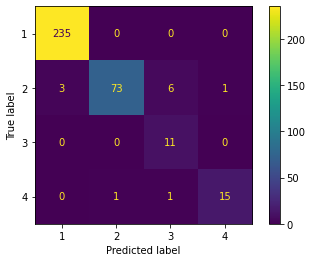

In [28]:
plot_confusion_matrix(rf, X_test, y_test)

## Box plot

In [29]:
results.append(accuracies_knn)
names.append("KNN")
results.append(accuracies_dt)
names.append("DT")
results.append(accuracies_rf)
names.append("RF")

In [30]:
results_mis.append(misclassification_dt)
results_mis.append(misclassification_rf)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cc12f40a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cc12f4ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cc12d7f40>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9cc12edd90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cd0671790>,
 'means': []}

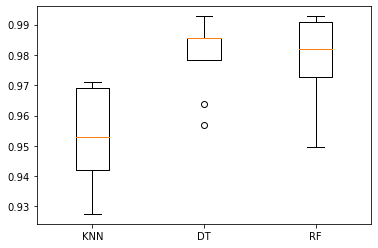

In [31]:
plt.boxplot(results, labels=names)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9cd08e98e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9cd08e9fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9cd08e9580>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9cd08f66a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cd08f6a00>,
 'means': []}

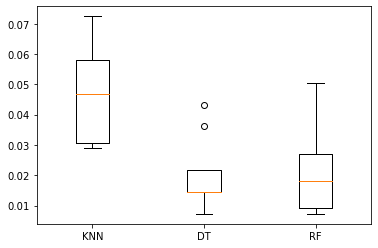

In [32]:
plt.boxplot(results_mis, labels=names)

In [33]:
y_test.shape

(346,)

## knn gridserach

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
    'weights':['uniform','distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,20,30,40,50]
            }

CV_knn_clf = GridSearchCV(estimator = knn, 
param_grid = param_grid , scoring = 'accuracy',cv=10, 
                          verbose = 1, n_jobs = -1)
CV_knn_clf.fit(X_train, y_train)

print(CV_knn_clf.best_params_)

knn_clf = KNeighborsClassifier(**CV_knn_clf.best_params_)

knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)
y_score = knn_clf.predict_proba(X_test)[:,1] # note probabilites for class 0 and 1 are returned in first and second columsn
#class 1 corresponds to positve (breast tomor case)



Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    3.8s


{'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 8, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:    6.6s finished


              precision    recall  f1-score   support

           1       1.00      0.96      0.98       244
           2       0.86      0.96      0.90        74
           3       0.91      0.67      0.77        15
           4       0.71      0.92      0.80        13

    accuracy                           0.95       346
   macro avg       0.87      0.88      0.86       346
weighted avg       0.95      0.95      0.95       346

0.9479768786127167


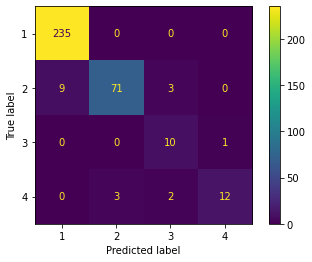

In [47]:
plot_confusion_matrix(knn_clf, X_test, y_test)
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

# DT gridsearch

In [60]:
param_grid = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
}

CV_dt_clf = GridSearchCV(dt, param_grid=param_grid, verbose=1,cv=10, n_jobs=-1)
CV_dt_clf.fit(X_train, y_train)

print(CV_dt_clf.best_params_)

dt_clf = DecisionTreeClassifier(**CV_dt_clf.best_params_,
 random_state=42)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
y_score = dt_clf.predict_proba(X_test)[:,1]

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 5506 tasks      | elapsed:    4.4s


{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:    4.7s finished


              precision    recall  f1-score   support

           1       1.00      0.99      0.99       238
           2       0.81      1.00      0.89        67
           3       1.00      0.42      0.59        26
           4       0.88      1.00      0.94        15

    accuracy                           0.95       346
   macro avg       0.92      0.85      0.85       346
weighted avg       0.96      0.95      0.94       346

0.9479768786127167


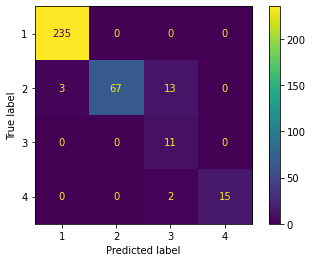

In [61]:
plot_confusion_matrix(dt_clf, X_test, y_test)
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

# RF gridsearch

In [58]:
param_grid = { 
    'n_estimators': [10, 50,100,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rf_clf = GridSearchCV(rf, param_grid=param_grid,
 verbose=1,cv=10, n_jobs=-1)
CV_rf_clf.fit(X_train, y_train)

print(CV_rf_clf.best_params_)

rf_clf = RandomForestClassifier(**CV_rf_clf.best_params_, 
random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_score = rf_clf.predict_proba(X_test)[:,1]

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.8min finished


{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100}


              precision    recall  f1-score   support

           1       1.00      0.99      0.99       238
           2       0.86      0.97      0.91        73
           3       0.91      0.56      0.69        18
           4       0.88      0.88      0.88        17

    accuracy                           0.96       346
   macro avg       0.91      0.85      0.87       346
weighted avg       0.96      0.96      0.95       346

0.9566473988439307


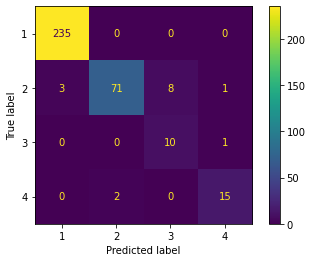

In [59]:
plot_confusion_matrix(rf_clf, X_test, y_test)
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

## RF grid_search cv=5

In [52]:
param_grid = { 
    'n_estimators': [10, 50,100,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rf_clf = GridSearchCV(rf, param_grid=param_grid,
 verbose=1,cv=5, n_jobs=-1)
CV_rf_clf.fit(X_train, y_train)

print(CV_rf_clf.best_params_)

rf_clf = RandomForestClassifier(**CV_rf_clf.best_params_, 
random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_score = rf_clf.predict_proba(X_test)[:,1]

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   32.1s


{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   48.9s finished


              precision    recall  f1-score   support

           1       1.00      0.99      1.00       237
           2       0.87      0.97      0.92        74
           3       0.82      0.53      0.64        17
           4       0.88      0.83      0.86        18

    accuracy                           0.96       346
   macro avg       0.89      0.83      0.85       346
weighted avg       0.96      0.96      0.95       346

0.9566473988439307


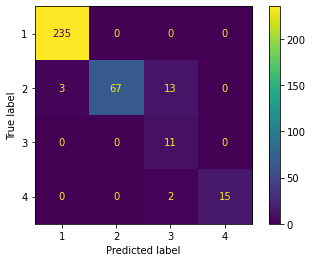

In [53]:
plot_confusion_matrix(dt_clf, X_test, y_test)
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

In [54]:
param_grid = { 
    'n_estimators': [10, 50,100,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rf_clf = GridSearchCV(rf, param_grid=param_grid,
 verbose=1,cv=2, n_jobs=-1)
CV_rf_clf.fit(X_train, y_train)

print(CV_rf_clf.best_params_)

rf_clf = RandomForestClassifier(**CV_rf_clf.best_params_, 
random_state=42)
rf_clf = rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
y_score = rf_clf.predict_proba(X_test)[:,1]

Fitting 2 folds for each of 150 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   14.6s


{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   19.8s finished


              precision    recall  f1-score   support

           1       1.00      0.99      1.00       237
           2       0.87      0.97      0.92        74
           3       0.82      0.53      0.64        17
           4       0.88      0.83      0.86        18

    accuracy                           0.96       346
   macro avg       0.89      0.83      0.85       346
weighted avg       0.96      0.96      0.95       346

0.9566473988439307


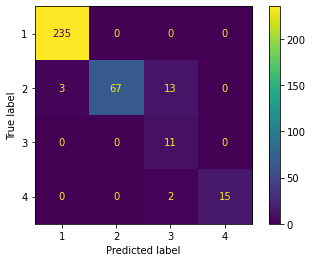

In [55]:
plot_confusion_matrix(dt_clf, X_test, y_test)
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))